In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [8]:
from google.colab import files
upload = files.upload()

Saving abalone.csv to abalone.csv


In [9]:
abalone = pd.read_csv('abalone.csv')


In [10]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [11]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


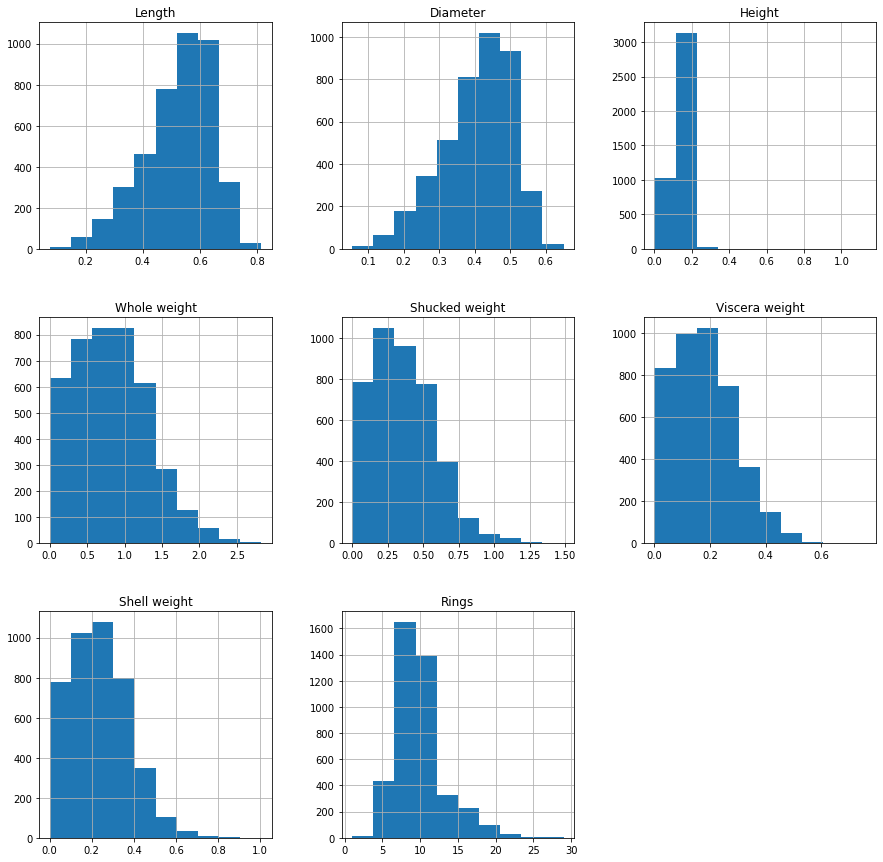

In [13]:
abalone.hist(figsize=(15,15))
plt.show()

In [14]:
# Criando a coluna target, em que 1 corresponde a 9 ou menos anéis e 0 corresponde a 10 ou mais anéis 

abalone['Target'] = np.where(abalone['Rings'] <= 10, 1, 0)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [15]:
# Os dados estão balanceados

abalone.Target.value_counts()

1    2730
0    1447
Name: Target, dtype: int64

In [16]:
# Utilizando dummies para alterar a variável categórica "Sex" em numérica

abalone = pd.get_dummies(abalone, 
                        prefix_sep='_',
                        columns=['Sex'],
                        drop_first=True)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Target,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,1,0


In [17]:
# Separação de features e target

X = abalone.drop(columns=['Target', 'Rings'])
y = abalone['Target']

In [20]:
# Preparando modelo

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                train_size=0.3,
                                                stratify=y_train,
                                                random_state=42)

In [22]:
skf = StratifiedKFold(n_splits=10)

In [23]:
# Árvore de decisão

model_tree = DecisionTreeClassifier()

In [24]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_tree = model_tree.predict(X_val)

In [26]:
# Métricas de avaliação do modelo
acuracia_tree = accuracy_score(y_val, y_pred_tree, normalize=True)
cv_score_tree = cross_val_score(model_tree,
                            X_train, y_train,
                            scoring='accuracy',
                            cv=skf)

print('Árvore de decisão', end='\n\n')
print(f'Acurácia: {acuracia_tree:.4}')
print(f'Média cross validation score: {cv_score_tree.mean():.4}')

Árvore de decisão

Acurácia: 0.7016
Média cross validation score: 0.6373


In [27]:
# Regressão Logística

logistic = LogisticRegression(random_state = 42)


In [28]:
logistic.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [29]:
# Agora vamos avaliar a qualidade nos dados de validação
y_pred = logistic.predict(X_val)

In [30]:
# Exibindo métricas
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54       304
           1       0.75      0.90      0.82       574

    accuracy                           0.74       878
   macro avg       0.73      0.67      0.68       878
weighted avg       0.73      0.74      0.72       878

